Sample data: [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

Default interpolation methods comparison:
Pandas default (method='linear'): [21.25, 32.5, 43.75]
NumPy default (method='linear'): [21.25, 32.5, 43.75]

Pandas quantile calculations with different interpolation methods:
Method 'linear': [21.25, 32.5, 43.75]
Method 'lower': [20, 30, 40]
Method 'higher': [25, 35, 45]
Method 'nearest': [20, 30, 45]
Method 'midpoint': [22.5, 32.5, 42.5]

NumPy quantile calculations with different interpolation methods:
Method 'linear': [21.25, 32.5, 43.75]
Method 'lower': [20, 30, 40]
Method 'higher': [25, 35, 45]
Method 'nearest': [20, 30, 45]
Method 'midpoint': [22.5, 32.5, 42.5]

Example with non-evenly divisible data length:
Data: [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
Data length: 11

Step-by-step calculation for quantile 0.25 with different methods:
Method 'linear': 22.5
Method 'lower': 20
Method 'higher': 25
Method 'nearest': 20
Method 'midpoint': 22.5

Manual calculation for quantile 0.25 

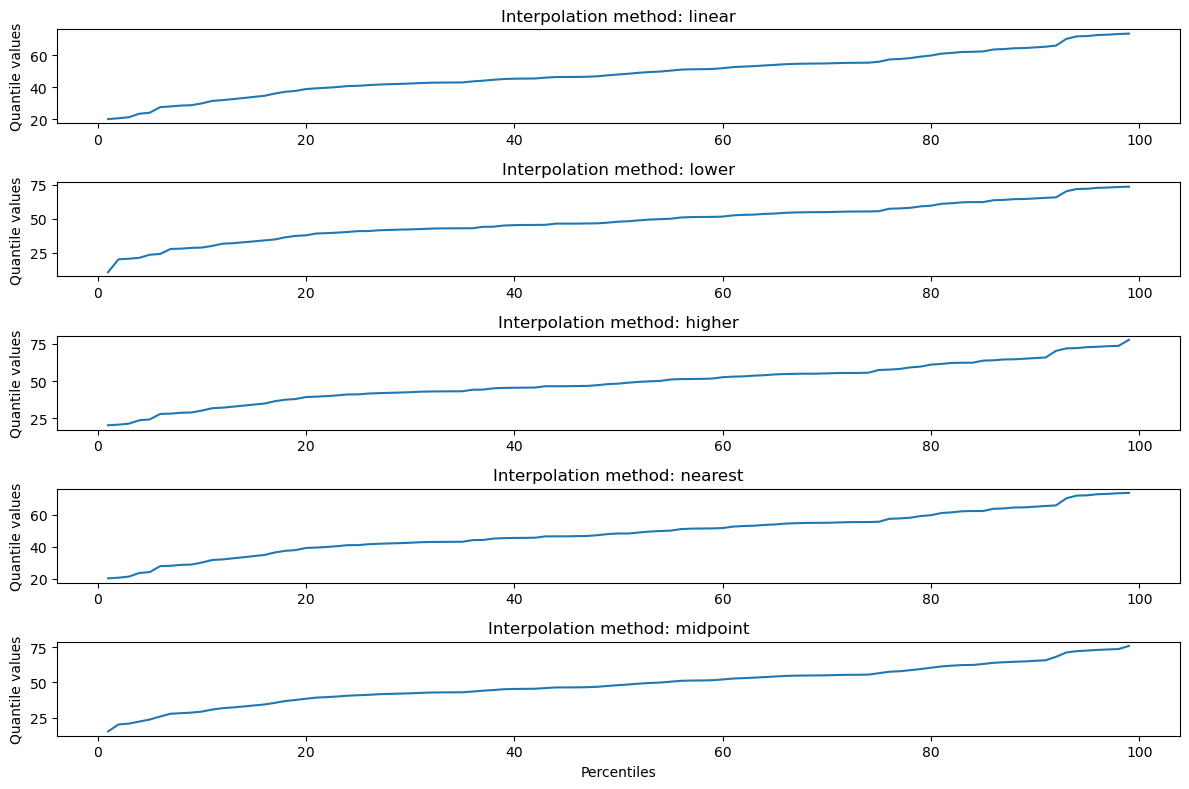

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample dataset
data = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
s = pd.Series(data)
print("Sample data:", data)

# Define quantiles to calculate
q_values = [0.25, 0.5, 0.75]

# Compare default interpolation methods in pandas and numpy
print("\nDefault interpolation methods comparison:")
print(f"Pandas default (method='linear'): {s.quantile(q_values).tolist()}")
print(f"NumPy default (method='linear'): {np.quantile(data, q_values).tolist()}")

# Compare different interpolation methods in pandas
interpolation_methods = ['linear', 'lower', 'higher', 'nearest', 'midpoint']

print("\nPandas quantile calculations with different interpolation methods:")
for method in interpolation_methods:
    result = s.quantile(q_values, interpolation=method).tolist()
    print(f"Method '{method}': {result}")

# Compare different interpolation methods in numpy
np_interpolation_methods = ['linear', 'lower', 'higher', 'nearest', 'midpoint']

print("\nNumPy quantile calculations with different interpolation methods:")
for method in np_interpolation_methods:
    result = np.quantile(data, q_values, method=method).tolist()
    print(f"Method '{method}': {result}")

# Detailed explanation with a non-evenly divisible example
print("\nExample with non-evenly divisible data length:")
odd_data = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
odd_s = pd.Series(odd_data)
print("Data:", odd_data)
print("Data length:", len(odd_data))

print("\nStep-by-step calculation for quantile 0.25 with different methods:")
for method in interpolation_methods:
    result = odd_s.quantile(0.25, interpolation=method)
    print(f"Method '{method}': {result}")

# Visual comparison of interpolation methods
plt.figure(figsize=(12, 8))

# Generate a larger dataset for visualization
np.random.seed(42)
vis_data = np.random.normal(50, 15, 100)
vis_data.sort()
vis_s = pd.Series(vis_data)

for i, method in enumerate(interpolation_methods):
    quantiles = [vis_s.quantile(q/100, interpolation=method) for q in range(1, 100)]
    plt.subplot(len(interpolation_methods), 1, i+1)
    plt.plot(range(1, 100), quantiles)
    plt.title(f"Interpolation method: {method}")
    plt.ylabel("Quantile values")
    if i == len(interpolation_methods) - 1:
        plt.xlabel("Percentiles")
    
plt.tight_layout()
# plt.show()  # Uncomment to display the plot

# Demonstrate how to calculate the specific formulas for different methods
print("\nManual calculation for quantile 0.25 with different interpolation methods:")
manual_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n = len(manual_data)
q = 0.25
index = q * (n - 1)
index_int = int(index)
index_frac = index - index_int

print(f"Data: {manual_data}")
print(f"n = {n}, q = {q}")
print(f"Index = q * (n - 1) = {q} * {n-1} = {index}")
print(f"Integer part of index: {index_int}, Fractional part: {index_frac}")

print(f"\n1. Linear interpolation (default): {manual_data[index_int] + index_frac * (manual_data[index_int + 1] - manual_data[index_int])}")
print(f"   = {manual_data[index_int]} + {index_frac} * ({manual_data[index_int + 1]} - {manual_data[index_int]})")
print(f"   = {manual_data[index_int]} + {index_frac} * {manual_data[index_int + 1] - manual_data[index_int]}")
print(f"   = {manual_data[index_int]} + {index_frac * (manual_data[index_int + 1] - manual_data[index_int])}")
print(f"   = {manual_data[index_int] + index_frac * (manual_data[index_int + 1] - manual_data[index_int])}")

print(f"\n2. Lower: {manual_data[index_int]}")
print(f"\n3. Higher: {manual_data[index_int + 1]}")
print(f"\n4. Nearest: {manual_data[index_int] if index_frac < 0.5 else manual_data[index_int + 1]}")
print(f"\n5. Midpoint: {(manual_data[index_int] + manual_data[index_int + 1]) / 2}")

In [2]:
import numpy as np
import pandas as pd

# Sample dataset
data = [12, 15, 19, 22, 25, 31, 38, 42, 47, 53]
print("Dataset:", data)
print("Number of values (n):", len(data))
print("Sorted:", sorted(data))  # Verify data is already sorted

# Calculate 25th percentile manually
q = 0.25  # We want the 25th percentile
n = len(data)  # Number of data points

# Step 1: Calculate the position index
position = q * (n - 1)
print("\nStep 1: Calculate position")
print(f"Position = q * (n - 1) = {q} * ({n} - 1) = {q} * {n-1} = {position}")

# Step 2: Separate the integer and fractional parts of the position
position_int = int(position)  # Integer part
position_frac = position - position_int  # Fractional part
print("\nStep 2: Separate integer and fractional parts")
print(f"Integer part: {position_int}")
print(f"Fractional part: {position_frac}")

# Step 3: Find the values at the integer position and the next position
value_lower = data[position_int]
value_higher = data[position_int + 1]
print("\nStep 3: Find values at positions")
print(f"Value at position {position_int}: {value_lower}")
print(f"Value at position {position_int + 1}: {value_higher}")

# Step 4: Perform linear interpolation
percentile_25 = value_lower + position_frac * (value_higher - value_lower)
print("\nStep 4: Perform linear interpolation")
print(f"25th percentile = value_lower + fractional_part * (value_higher - value_lower)")
print(f"                = {value_lower} + {position_frac} * ({value_higher} - {value_lower})")
print(f"                = {value_lower} + {position_frac} * {value_higher - value_lower}")
print(f"                = {value_lower} + {position_frac * (value_higher - value_lower)}")
print(f"                = {percentile_25}")

# Verify with pandas
pandas_result = pd.Series(data).quantile(0.25)
print("\nVerification using pandas:")
print(f"pd.Series(data).quantile(0.25) = {pandas_result}")

# Verify with numpy
numpy_result = np.quantile(data, 0.25)
print("\nVerification using numpy:")
print(f"np.quantile(data, 0.25) = {numpy_result}")

Dataset: [12, 15, 19, 22, 25, 31, 38, 42, 47, 53]
Number of values (n): 10
Sorted: [12, 15, 19, 22, 25, 31, 38, 42, 47, 53]

Step 1: Calculate position
Position = q * (n - 1) = 0.25 * (10 - 1) = 0.25 * 9 = 2.25

Step 2: Separate integer and fractional parts
Integer part: 2
Fractional part: 0.25

Step 3: Find values at positions
Value at position 2: 19
Value at position 3: 22

Step 4: Perform linear interpolation
25th percentile = value_lower + fractional_part * (value_higher - value_lower)
                = 19 + 0.25 * (22 - 19)
                = 19 + 0.25 * 3
                = 19 + 0.75
                = 19.75

Verification using pandas:
pd.Series(data).quantile(0.25) = 19.75

Verification using numpy:
np.quantile(data, 0.25) = 19.75


In [3]:
# 0    1   2   3   4   5   6   7   8   9
# 12, 15, 19, 22, 25, 31, 38, 42, 47, 53

In [7]:
df = pd.DataFrame(data, columns=['Marks'])
df

,Marks
0,12
1,15
2,19
3,22
4,25
5,31
6,38
7,42
8,47
9,53


In [8]:
df.describe()

,Marks
count,10.00000
mean,30.40000
std,14.08072
min,12.00000
25%,19.75000
50%,28.00000
75%,41.00000
max,53.00000


In [12]:
import pandas as pd

# Sample DataFrame with student marks using Indian names
data = {
    'Student': ['Arjun', 'Bhavya', 'Chandan', 'Divya', 'Eesha', 
                'Farhan', 'Geeta', 'Harish', 'Ishaan', 'Jaya'],
    'Math': [65, 72, 85, 90, 95, 60, 78, 82, 88, 45],
    'Science': [70, 85, 92, 75, 60, 88, 95, 78, 65, 72]
}

df = pd.DataFrame(data)
df

,Student,Math,Science
0,Arjun,65,70
1,Bhavya,72,85
2,Chandan,85,92
3,Divya,90,75
4,Eesha,95,60
5,Farhan,60,88
6,Geeta,78,95
7,Harish,82,78
8,Ishaan,88,65
9,Jaya,45,72


In [15]:
len(df)

10

In [16]:
df['Math'].sort_values

<bound method Series.sort_values of 0    65
1    72
2    85
3    90
4    95
5    60
6    78
7    82
8    88
9    45
Name: Math, dtype: int64>

In [23]:
df['Math'].sort_values(ascending=True)

9    45
5    60
0    65
1    72
6    78
7    82
2    85
8    88
3    90
4    95
Name: Math, dtype: int64

In [24]:
(72-65) * 0.25

1.75

In [25]:
65+(72-65) * 0.25

66.75

In [26]:
# Calculate 25th percentile for each subject
math_p25 = df['Math'].quantile(0.25)
science_p25 = df['Science'].quantile(0.25)
math_p25, science_p25

(66.75, 70.5)

In [ ]:
#calculate for science manually

In [ ]:


print(f"25th percentile for Math: {math_p25}")
print(f"25th percentile for Science: {science_p25}")

# Find students with marks below the 25th percentile in each subject
math_below_p25 = df[df['Math'] < math_p25]
science_below_p25 = df[df['Science'] < science_p25]

print("\nStudents with Math marks below 25th percentile:")
print(math_below_p25[['Student', 'Math']])

print("\nStudents with Science marks below 25th percentile:")
print(science_below_p25[['Student', 'Science']])

# Find students below 25th percentile in both subjects
both_below = df[(df['Math'] < math_p25) & (df['Science'] < science_p25)]
print("\nStudents below 25th percentile in both subjects:")
print(both_below[['Student', 'Math', 'Science']])